# JAMES CHUKWUKA TABANSI
## Background and Context

* In recent times, the field of agriculture has been in urgent need of modernizing, since the amount of manual work people need to put in to check if plants are growing correctly is still highly extensive. Despite several advances in agricultural technology, people working in the agricultural industry still need to have the ability to sort and recognize different plants and weeds, which takes a lot of time and effort in the long term.

* The potential is ripe for this trillion-dollar industry to be greatly impacted by technological innovations that cut down on the requirement for manual labor, and this is where Artificial Intelligence can benefit the workers in this field, as the time and energy required to identify plant seedlings will be greatly shortened by the use of AI and Deep Learning. The ability to do so far more efficiently and even more effectively than experienced manual labor could lead to better crop yields, the freeing up of human involvement for higher-order agricultural decision making, and in the long term will result in more sustainable environmental practices in agriculture as well.

###  Objective

- The Aarhus University Signal Processing group, in collaboration with the University of Southern Denmark, has provided the data containing images of unique plants belonging to 12 different species. You being a data scientist, need to build a Convolutional Neural Network model which would classify the plant seedlings into their respective 12 categories.

### Data Description

* This dataset contains images of unique plants belonging to 12 different species.
* The data file names are:
images.npy
Label.csv
Due to the large volume of data, the images were converted to numpy arrays and stored in images.npy file and the corresponding labels are also put into Labels.csv so that you can work on the data/project seamlessly without having to worry about the high data volume.
#### The goal of the project is to create a classifier capable of determining a plant's species from an image.

List of Plant species

- Black-grass
- Charlock
- Cleavers
- Common Chickweed
- Common Wheat
- Fat Hen
- Loose Silky-bent
- Maize
- Scentless Mayweed
- Shepherds Purse
- Small-flowered Cranesbill
- Sugar beet


# Scope of Project
- Load the data and labels
- EDA
- Input preprocessing
- build a simple cnn and train
- balance the data and retrain
- augment the balanced data and retrain
- transfered learning and retrain
- fine tuned transfered learning and retrain
- hyper parameter tuning and retrain

## Import Relevant Packages

In [1]:
import numpy as np #for numerical computation
import pandas as pd # for reading csv data 
import seaborn as sns # for visualization and plotting
import matplotlib.pyplot as plt #for visualizing plots and images
import os  # for reading and creating path and directories
import cv2 # for loading images

import tensorflow as tf
#from tensorflow.keras.models import Sequential                                                   # Importing the sequential module to define a sequential model

from tensorflow.keras.models import Sequential #for defining sequential layout
from tensorflow.keras.layers import Dense, Dropout, Conv2D, Flatten, MaxPooling2D #adding different layer types
from tensorflow.keras.optimizers import Adam, Adamax, SGD #for optimization operation
from tensorflow.keras.backend import clear_session  #clear backend
from tensorflow.keras.utils import to_categorical #binarizing the target variable
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping #for minimizing overfiting and saving the best model
from tensorflow.keras.preprocessing.image import ImageDataGenerator  #for data augmentation

#metric
from tensorflow.keras.metrics import Accuracy
from sklearn.model_selection import train_test_split  #for spliting the dataset
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, classification_report #for displaying a confusion matrix




## Mount Google Drive

In [2]:
from google.colab import drive #for mounting drive
drive.mount('/content/drive')

Mounted at /content/drive


## Load the Dataset

In [3]:
#define label path
csv_path = '/content/drive/MyDrive/datasets/project/Labels-2.csv'
#read file
labels = pd.read_csv(csv_path)

#define image file path
image_path = '/content/drive/MyDrive/datasets/project/images-2.npy'
#load the file
images = np.load(image_path)

## Data Exploration

In [4]:
#check the number of images 
print("There are", len(images), "number of images")


There are 4750 number of images


In [5]:
#check the dimension of each images to ensure they are consistent
#define an empty list
series = []

#itirating through images, return the dim of each image to the list
for i in range(len(images)):
  series.append(images[i].shape)

#import counter to count the unique values
from collections import Counter
Counter(series)


Counter({(128, 128, 3): 4750})

* this means that all 4,750 images have a uniform dimension of 128 by 128 and they are coloured images hence the channel value of 3.

In [6]:
#display 10 samples of the dataframe
labels.sample(n=10)

,Label
2395,Charlock
1444,Common Chickweed
1441,Common Chickweed
2981,Scentless Mayweed
3494,Sugar beet
2510,Cleavers
227,Small-flowered Cranesbill
2208,Charlock
3921,Black-grass
4713,Loose Silky-bent


In [7]:
print(f"There are {len(labels)} labels")

There are 4750 labels


In [8]:
print(f"There are {labels['Label'].nunique()} categories of plant seedling, They are: ") #print the number of categories of plant seedling in the data
Counter(labels['Label'])

There are 12 categories of plant seedling, They are: 


Counter({'Small-flowered Cranesbill': 496,
         'Fat Hen': 475,
         'Shepherds Purse': 231,
         'Common wheat': 221,
         'Common Chickweed': 611,
         'Charlock': 390,
         'Cleavers': 287,
         'Scentless Mayweed': 516,
         'Sugar beet': 385,
         'Maize': 221,
         'Black-grass': 263,
         'Loose Silky-bent': 654})

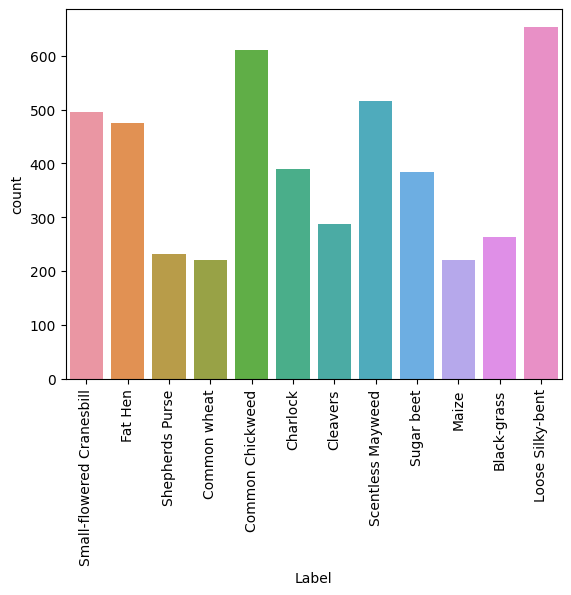

In [9]:
#display using a countplot the number of labels available for each class
sns.countplot(data=labels, x='Label')
plt.xticks(rotation=90)
plt.show()

* the images are imbalanced with respect to number of images for each category.
* the implication is that the model may not predict the imbalanced category as well as it would do for other categories.

### Visualize some of the images

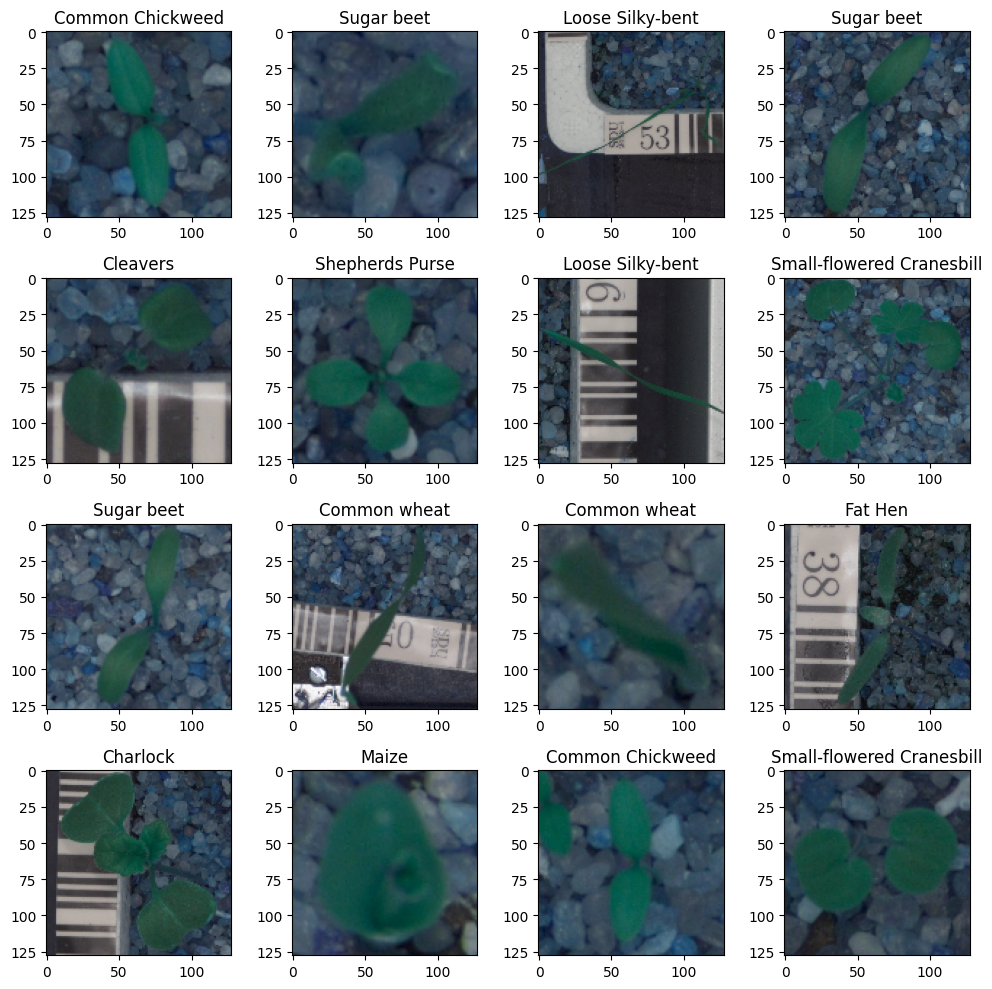

In [10]:
import random
#steps to do that
#define a figure of speeciifed size
fig = plt.figure(figsize=(10,10))
#create a subplot of of 4 by 4
cols = 4
rows = 4
for x in range(cols):
  for y in range(rows):
    random_index = random.randint(0, len(images)) #random index generator
    ax=plt.subplot(cols,rows,  x * rows + y + 1) #create a subplot for every index value
#randomly select an image to be displayed with the label displayed as title
    ax=plt.imshow(images[random_index])  #display the subsetted image on the subplot
    plt.title(labels['Label'][random_index])  #display its label as the title
plt.tight_layout()  #pad the frame
plt.show()#show it

### checking to see if the images were read in BRG by openCV

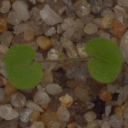

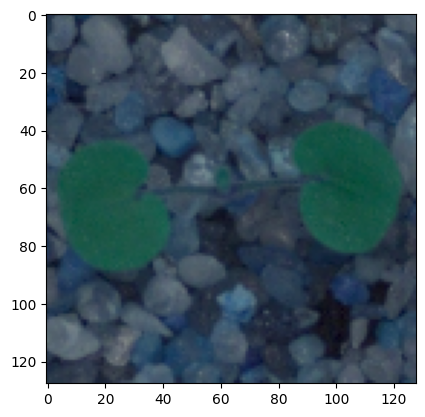

In [11]:
# Display images using OpenCV
from google.colab.patches import cv2_imshow  

#display an image using opencv
cv2_imshow(images[0])

#display the same image using matplotlib
plt.imshow(images[0])

plt.show()

* We can observe that the images are being shown in different colors when plotted with openCV and matplotlib as OpenCV reads images in BGR format and this shows that the given numpy arrays were generated from the original images using OpenCV.
* Now we will convert these BGR images to RGB images so we could interpret them easily.

In [12]:
for i in range(len(images)):
  images[i] = cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB)

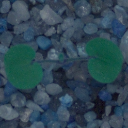

In [13]:
#display the image using opencv
cv2_imshow(images[0])



## Insights From EDA
* there are 4,750 images of plant seedlings in 12 different categories.
* the data set is imbalanced
* the images are of dimension: 128, 128, 3.
* the images were read using cv2 in BGR and was converted to RGB

## Data Preprocessing

#### context
- reshape the dimension of the image
- blur the images
- split the dataset
- normalize the train, val and test set
- encode the target sets

#### Reshape the dimension of the image to 64, 64, 3
- this is done because a high dimensional image will be computationally intensive to train and will take more time.

In [14]:
red_image = [] #an empty list to store the new arrays of shape (64, 64)
for i in range(len(images)):  #iterate through length of images
  red_image.append(cv2.resize(images[i], dsize=(64,64), interpolation = cv2.INTER_NEAREST))  #resize the image
print(red_image[1].shape) #check the dimension of an image

(64, 64, 3)


#### Blur the images
* this is done to lessen the noise in the image and could help the model focus on the main aspect of the image which are the plant seedlings

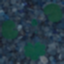

In [15]:
img_gb = [] #empty list to store blurred image arrays

for i in range(len(images)):  #iterate through length of images
  img_gb.append(cv2.GaussianBlur(red_image[i], (3,3), sigmaX=0))

#display a blurred image
cv2_imshow(img_gb[1])

#### split the dataset
* although the dataset is relatively small, the dataset will be split into train,  validation and test set to minimize information leakage. Especially since data augmentation is expected to be applied later that will increase the size of the data

In [16]:
#split the datasets into 80% for training
x_train, X, y_train, Y = train_test_split(np.array(img_gb), labels, stratify=labels, train_size=0.8, random_state=50)

#split the remaining 20% equaLLY FOR val and test set
x_val, x_test, y_val, y_test = train_test_split(X, Y, stratify=Y, random_state=50, test_size=0.5)

In [17]:
print(x_train.shape,y_train.shape)
print(x_val.shape,y_val.shape)
print(x_test.shape,y_test.shape)

(3800, 64, 64, 3) (3800, 1)
(475, 64, 64, 3) (475, 1)
(475, 64, 64, 3) (475, 1)


#### Normalize the features
* this is done to bring all the values of the array to a similar scale. It is simply to divide each value by 255

In [18]:
x_train_sc = x_train.astype(float) / 255
x_test_sc = x_test.astype(float) / 255
x_val_sc = x_val.astype(float) / 255

#### Encode the target
* this could be done using LabelBinarizer or a mix of to_categorical and Labelencoder
* it is done to represent each category of target for the neural network

In [19]:
from sklearn.preprocessing import LabelBinarizer
enc = LabelBinarizer()
y_train_en = enc.fit_transform(y_train)
y_val_en=enc.transform(y_val)
y_test_en=enc.transform(y_test)
y_train_en

array([[0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0]])

## Model Development

#### scope:
* clear backend and set seed
* model architecture
* compile the model
* fit the model
* evaluate the accuracy

In [20]:
from tensorflow.keras.layers import BatchNormalization

In [21]:
from tensorflow.keras import backend 

#to clear the backend 
backend.clear_session()

import random
random.seed(50) #set seed variable
tf.random.set_seed(50)
np.random.seed(50)

In [22]:
#initialize a sequential framework for adding layers easily
model = Sequential()

#add a conv2d layer with 32 filters and kernel size of (3,3). The strides will be at 1,1 and padding will be 'same' to avoid reduction in size of
#extracted feature map. 
model.add(Conv2D(32, (3,3), strides=(1,1), padding='same', input_shape=(64, 64, 3), activation='relu'))

#add a MaxPooling2D layer
#model.add(MaxPooling2D())



# Adding second conv layer with 64 filters and kernel size 3x3 , padding 'same'
model.add(Conv2D(64, (3,3), padding='same', activation = 'relu'))

# Adding max pooling to reduce the size of output of second conv layer
model.add(MaxPooling2D())

# Adding second conv layer with 32 filters and kernel size 3x3 , padding 'same'
model.add(Conv2D(64, (3,3), padding='same', activation = 'relu'))

# Adding max pooling to reduce the size of output of second conv layer
model.add(MaxPooling2D())


# add a flatten layer to flatten the extracted feature maps from the convolutional blocks
model.add(Flatten())

#add a dense layer with 64 neurons
model.add(Dense(124, activation='relu'))

#add a dropout layer
model.add(Dropout(0.2))

#add a dense layer with 32 neurons
model.add(Dense(32, activation='relu'))

# Adding the output layer with 12 neurons and activation functions as softmax since this is a multi-class classification problem  
model.add(Dense(units=len(np.unique(y_train)), activation = 'softmax'))


#compile the model
model.compile(metrics=['accuracy'], loss='categorical_crossentropy', optimizer='adam')

#model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 64)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 16384)             0

In [23]:
# to stop training when model stops improving
es = EarlyStopping(monitor='val_accuracy', mode='max', patience=4,verbose=2)

#model checkpoint to save best model performance at every epoch
ms = ModelCheckpoint(filepath = '/content/drive/MyDrive/datasets/project/model_1',
    monitor='val_accuracy',verbose = 2, save_best_only = True, mode='max',save_weights_only=True)

In [24]:
seed_classifier = model.fit(x=x_train_sc, y=y_train_en, batch_size=32, epochs=10,
                            verbose=2, validation_data=(x_val_sc, y_val_en), callbacks=[es, ms])


Epoch 1/10

Epoch 1: val_accuracy improved from -inf to 0.44421, saving model to /content/drive/MyDrive/datasets/project/model_1
119/119 - 16s - loss: 2.1921 - accuracy: 0.2526 - val_loss: 1.6600 - val_accuracy: 0.4442 - 16s/epoch - 130ms/step
Epoch 2/10

Epoch 2: val_accuracy improved from 0.44421 to 0.52632, saving model to /content/drive/MyDrive/datasets/project/model_1
119/119 - 2s - loss: 1.5818 - accuracy: 0.4453 - val_loss: 1.3943 - val_accuracy: 0.5263 - 2s/epoch - 13ms/step
Epoch 3/10

Epoch 3: val_accuracy improved from 0.52632 to 0.57263, saving model to /content/drive/MyDrive/datasets/project/model_1
119/119 - 1s - loss: 1.3079 - accuracy: 0.5416 - val_loss: 1.2435 - val_accuracy: 0.5726 - 1s/epoch - 12ms/step
Epoch 4/10

Epoch 4: val_accuracy improved from 0.57263 to 0.63789, saving model to /content/drive/MyDrive/datasets/project/model_1
119/119 - 1s - loss: 1.1352 - accuracy: 0.5947 - val_loss: 1.0700 - val_accuracy: 0.6379 - 1s/epoch - 12ms/step
Epoch 5/10

Epoch 5: val

### Model Performace Evaluation
##### scope
* plot the validation accuracy against training accuracy to check level of overfitting
* plot a confusion matrix after making prediction
* show a classification report
* display predictions with the images

In [96]:
#plot val_accuracy against train_accuracy
def accuracy_plotter(model, figsize=(5,5)):
  """
  plots val_accuracy against train_accuracy
  model: trained model
  figsize=size of plot
  """
  plt.figure(figsize=figsize)  #sets the figsize of the figure
  plt.plot(model.history['accuracy']) #plots the accuracy on the y axis 
  plt.plot(model.history['val_accuracy']) #plots the val_accuracy on the same axis

  plt.xlabel('epochs') #set x label
  plt.legend(['train_accuracy', 'validation_accuracy'], loc='best')
  plt.show()

#plot a confusion matrix

def confusion_matrix_plot(models, x_vals, y_vals_en, y_vals):
  """
  plots a confusion_matrix  and prints a classification report
  model: trained model
  x_vals: validation or test set
  y_vals_en: encoded validation or test set for the labels
  y_vals: validation or test set for the labels
  """
  #make a prediction using the trained model
  y_pred = models.predict(x_vals)

  #return the index of max_probability for each row
  pred_class = np.argmax(y_pred, axis=1)

  #return the index of class for each row in the true dataset
  true_class = np.argmax(y_vals_en, axis=1)

  #compute the confusion matric
  cm = tf.math.confusion_matrix(true_class, pred_class)
  
  #plot the cm
  from sklearn.metrics import ConfusionMatrixDisplay
  #Confdsip = ConfusionMatrixDisplay(cm, display_labels=np.unique(y_vals))
  sns.heatmap(cm,xticklabels= np.unique(y_vals), yticklabels = np.unique(y_vals), annot=True,fmt = ".0f", )

  #display the cm
  #Confdsip.plot()
  plt.show()


  #print classification report
  print(classification_report(true_class, pred_class))



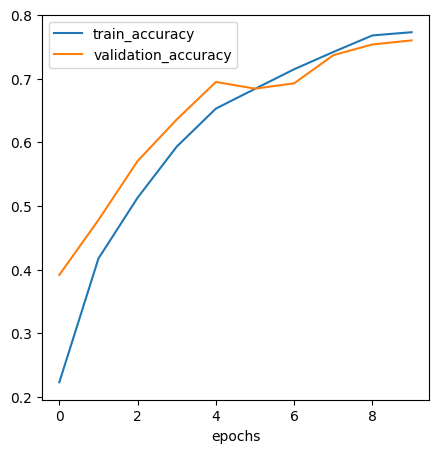

In [97]:
accuracy_plotter(seed_classifier)

* the model appears to generalize well up till the 6th epoch as accuracy score of the training exceeded the score gotten during validation


15/15 [==============================] - 0s 5ms/step


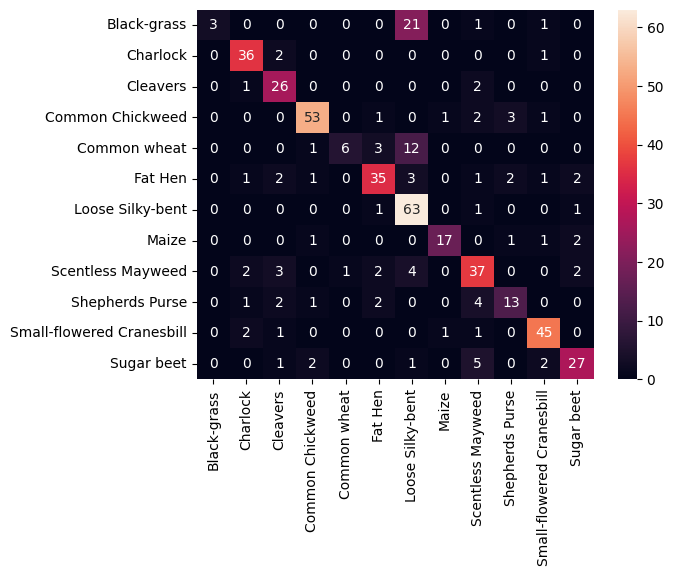

              precision    recall  f1-score   support

           0       1.00      0.12      0.21        26
           1       0.84      0.92      0.88        39
           2       0.70      0.90      0.79        29
           3       0.90      0.87      0.88        61
           4       0.86      0.27      0.41        22
           5       0.80      0.73      0.76        48
           6       0.61      0.95      0.74        66
           7       0.89      0.77      0.83        22
           8       0.69      0.73      0.70        51
           9       0.68      0.57      0.62        23
          10       0.87      0.90      0.88        50
          11       0.79      0.71      0.75        38

    accuracy                           0.76       475
   macro avg       0.80      0.70      0.70       475
weighted avg       0.79      0.76      0.74       475



In [98]:
confusion_matrix_plot(model, x_val_sc, y_val_en, y_val)

* although the data was imbalanced, the model had an average validation precision of 0.80, avergae recall_score of 0.7 and average f1score of 0.7.

* the classification report also shows the precision, recall and f1 score for each category and class 0 and 4 had recall score below 0.5. This could partly be as a result of imbalance in the data.

## Model Imporvement Strategy : Balancing Data
* the idea behind data balancing technique is that an imbalance data can lead to poor average precision during machine learning classification as the model may predict some classes much better than others.
* the disadvantage however is that if the undersampled categories and resampled as duplicates, the model might overlearn the features and ovefit in th process which will lead to poor generalization.
* another disadvantage is that the trainin time is extended further which could result in higher chances of overfiting
### Balancing the data and retrain
##### scope:
* balance the train set
* retrain the model
* evaluate the performance and compare with previous model



In [99]:
from imblearn.tensorflow import balanced_batch_generator
#from imblearn.over_sampling import MMO

In [100]:
#oversamplingg techniques does not work with features with more than 2dims hence i will resample to inputs to (n_feat, dim1*dim2*dim3)
x_train_reshaped = np.reshape(x_train, (x_train.shape[0], -1))
x_train_reshaped.shape #new shape of the images


(3800, 12288)

In [101]:
x_train.shape  #original shape of the input features

(3800, 64, 64, 3)

In [102]:
from imblearn.over_sampling import ADASYN,RandomOverSampler

In [103]:
ros=RandomOverSampler(random_state=50)
x_train_bal, y_train_bal = ros.fit_resample(x_train_reshaped, y_train)

In [104]:
x_train_bal.shape #shape of the balanced data

(6276, 12288)

* the number of features have increased to 6,276

In [105]:
#reshaping back to our orignal dimension
prefered_dim = (-1,) + x_train.shape[1:]
print(prefered_dim) #show the prefered dim
x_train_reshaped = np.reshape(x_train_bal, prefered_dim)  #reshape to prefered dim
x_train_reshaped.shape

(-1, 64, 64, 3)


(6276, 64, 64, 3)

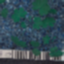

In [106]:
cv2_imshow(x_train_reshaped[0])  #view a sample of the x_train images

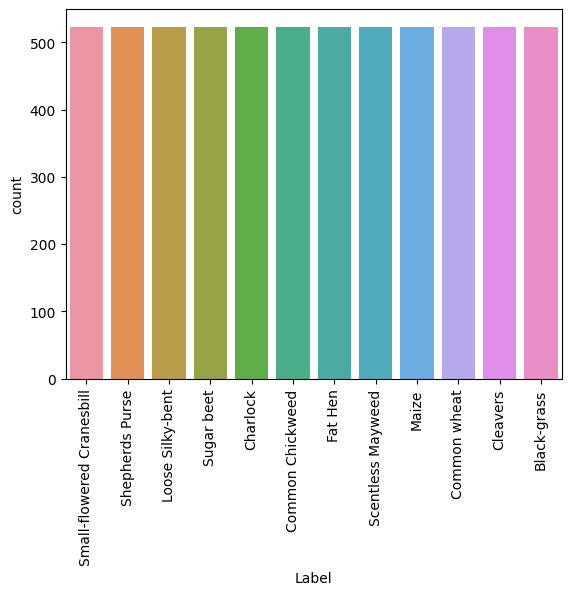

In [107]:
#display the balanced data using a countplot
sns.countplot(data=y_train_bal, x='Label')
plt.xticks(rotation=90)
plt.show()

* this shows that the classes are equal

## Preparation of the new train set
#### scope:
* normalize the input train feature
* encode the train target

In [108]:
#normalize the input train feature
x_train_bal_sc = x_train_reshaped.astype(float) / 255

#encode train target
enc = LabelBinarizer()
#encode the new train set
y_train_en = enc.fit_transform(y_train_bal)
#transform the val set
y_val_en=enc.transform(y_val)
#transform the tst
y_test_en=enc.transform(y_test)
y_train_en

array([[0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1]])

## Model Architecture and Development
#### Scope:
* clear backend and set seed
* use the same architecture as the previous model
* train the network
* evaluate the performance

In [109]:
#clear backend
backend.clear_session()

#set seed
import random
random.seed(50)
tf.random.set_seed(50)
np.random.seed(50)


In [110]:
#clear backend
backend.clear_session()

#set seed
import random
random.seed(50)
tf.random.set_seed(50)
np.random.seed(50)

#initialize a sequential framework for adding layers easily
model = Sequential()

#add a conv2d layer with 32 filters and kernel size of (3,3). The strides will be at 1,1 and padding will be 'same' to avoid reduction in size of
#extracted feature map. 
model.add(Conv2D(32, (3,3), strides=(1,1), padding='same', input_shape=(64, 64, 3), activation='relu'))

#add a MaxPooling2D layer
#model.add(MaxPooling2D())



# Adding second conv layer with 32 filters and kernel size 3x3 , padding 'same'
model.add(Conv2D(64, (3,3), padding='same', activation = 'relu'))

# Adding max pooling to reduce the size of output of second conv layer
model.add(MaxPooling2D())

# Adding second conv layer with 64 filters and kernel size 3x3 , padding 'same'
model.add(Conv2D(64, (3,3), padding='same', activation = 'relu'))

# Adding max pooling to reduce the size of output of second conv layer
model.add(MaxPooling2D())


# add a flatten layer to flatten the extracted feature maps from the convolutional blocks
model.add(Flatten())

#add a dense layer with 64 neurons
model.add(Dense(124, activation='relu'))

#add a dropout layer
model.add(Dropout(0.2))

#add a dense layer with 32 neurons
model.add(Dense(32, activation='relu'))

# Adding the output layer with 12 neurons and activation functions as softmax since this is a multi-class classification problem  
model.add(Dense(units=len(np.unique(y_train)), activation = 'softmax'))


#compile the model
model.compile(metrics=['accuracy'], loss='categorical_crossentropy', optimizer='adam')

#model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 64)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 16384)             0

In [25]:
es = EarlyStopping(monitor='val_accuracy', mode='max', patience=4,verbose=2)

#model checkpoint to save best model performance at every epoch
ms = ModelCheckpoint(filepath = '/content/drive/MyDrive/datasets/project/balanced_model_2.hdf5',
    monitor='val_accuracy',verbose = 2, save_best_only = True, mode='max',save_weights_only=True)

In [112]:
seed_classifier2 = model.fit(x=x_train_bal_sc, y=y_train_en, batch_size=32, epochs=10,
                            verbose=2, validation_data=(x_val_sc, y_val_en), callbacks=[es, ms])


Epoch 1/10
197/197 - 5s - loss: 1.8811 - accuracy: 0.3078 - val_loss: 1.5488 - val_accuracy: 0.4189 - 5s/epoch - 24ms/step
Epoch 2/10
197/197 - 2s - loss: 1.2406 - accuracy: 0.5465 - val_loss: 1.3298 - val_accuracy: 0.5432 - 2s/epoch - 10ms/step
Epoch 3/10
197/197 - 2s - loss: 0.8712 - accuracy: 0.6874 - val_loss: 1.0012 - val_accuracy: 0.6905 - 2s/epoch - 10ms/step
Epoch 4/10
197/197 - 2s - loss: 0.6117 - accuracy: 0.7841 - val_loss: 1.0650 - val_accuracy: 0.6463 - 2s/epoch - 10ms/step
Epoch 5/10
197/197 - 2s - loss: 0.4850 - accuracy: 0.8260 - val_loss: 0.9939 - val_accuracy: 0.6989 - 2s/epoch - 11ms/step
Epoch 6/10
197/197 - 2s - loss: 0.3672 - accuracy: 0.8719 - val_loss: 0.8501 - val_accuracy: 0.7579 - 2s/epoch - 11ms/step
Epoch 7/10
197/197 - 2s - loss: 0.2727 - accuracy: 0.9049 - val_loss: 1.0807 - val_accuracy: 0.7116 - 2s/epoch - 10ms/step
Epoch 8/10
197/197 - 2s - loss: 0.2301 - accuracy: 0.9222 - val_loss: 0.9727 - val_accuracy: 0.7495 - 2s/epoch - 10ms/step
Epoch 9/10
197/1

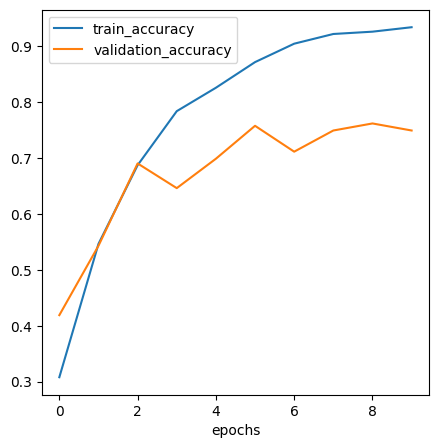

In [113]:
#performance evaluation
accuracy_plotter(seed_classifier2)

* although a higher accuracy was obtained, the network started to overfit on the data at the 3rd epoch and the degree of overfiting increased with every epoch. 
* i will increase dropout rate to 0.5 to attempt combating overfiting

In [114]:
#clear backend
backend.clear_session()

#set seed
import random
random.seed(50)
tf.random.set_seed(50)
np.random.seed(50)

#initialize a sequential framework for adding layers easily
model = Sequential()

#add a conv2d layer with 32 filters and kernel size of (3,3). The strides will be at 1,1 and padding will be 'same' to avoid reduction in size of
#extracted feature map. 
model.add(Conv2D(32, (3,3), strides=(1,1), padding='same', input_shape=(64, 64, 3), activation='relu'))

#add a MaxPooling2D layer
#model.add(MaxPooling2D())



# Adding second conv layer with 32 filters and kernel size 3x3 , padding 'same'
model.add(Conv2D(64, (3,3), padding='same', activation = 'relu'))

# Adding max pooling to reduce the size of output of second conv layer
model.add(MaxPooling2D())

# Adding second conv layer with 64 filters and kernel size 3x3 , padding 'same'
model.add(Conv2D(64, (3,3), padding='same', activation = 'relu'))

# Adding max pooling to reduce the size of output of second conv layer
model.add(MaxPooling2D())


# add a flatten layer to flatten the extracted feature maps from the convolutional blocks
model.add(Flatten())

#add a dense layer with 64 neurons
model.add(Dense(124, activation='relu'))

#add a dropout layer
model.add(Dropout(0.5))

#add a dense layer with 32 neurons
model.add(Dense(32, activation='relu'))

# Adding the output layer with 12 neurons and activation functions as softmax since this is a multi-class classification problem  
model.add(Dense(units=len(np.unique(y_train)), activation = 'softmax'))


#compile the model
model.compile(metrics=['accuracy'], loss='categorical_crossentropy', optimizer='adam')

#model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 64)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 16384)             0

In [115]:
es = EarlyStopping(monitor='val_accuracy', mode='max', patience=4,verbose=2)

#model checkpoint to save best model performance at every epoch
ms = ModelCheckpoint(filepath = '/content/drive/MyDrive/datasets/project/balanced_model_2b.hdf5',
    monitor='val_accuracy',verbose = 0, save_best_only = True, mode='max',save_weights_only=True)

In [116]:
seed_classifier2 = model.fit(x=x_train_bal_sc, y=y_train_en, batch_size=32, epochs=10,
                            verbose=2, validation_data=(x_val_sc, y_val_en), callbacks=[es, ms])

Epoch 1/10
197/197 - 5s - loss: 2.1170 - accuracy: 0.2143 - val_loss: 1.7140 - val_accuracy: 0.3411 - 5s/epoch - 27ms/step
Epoch 2/10
197/197 - 2s - loss: 1.7075 - accuracy: 0.3611 - val_loss: 1.4899 - val_accuracy: 0.4653 - 2s/epoch - 11ms/step
Epoch 3/10
197/197 - 2s - loss: 1.4514 - accuracy: 0.4431 - val_loss: 1.3285 - val_accuracy: 0.5242 - 2s/epoch - 11ms/step
Epoch 4/10
197/197 - 2s - loss: 1.2821 - accuracy: 0.5100 - val_loss: 1.1674 - val_accuracy: 0.5663 - 2s/epoch - 10ms/step
Epoch 5/10
197/197 - 2s - loss: 1.1507 - accuracy: 0.5634 - val_loss: 1.0718 - val_accuracy: 0.6442 - 2s/epoch - 11ms/step
Epoch 6/10
197/197 - 2s - loss: 1.0579 - accuracy: 0.6031 - val_loss: 1.0487 - val_accuracy: 0.6779 - 2s/epoch - 11ms/step
Epoch 7/10
197/197 - 2s - loss: 0.9882 - accuracy: 0.6300 - val_loss: 0.9656 - val_accuracy: 0.7074 - 2s/epoch - 11ms/step
Epoch 8/10
197/197 - 2s - loss: 0.8619 - accuracy: 0.6845 - val_loss: 0.9896 - val_accuracy: 0.7137 - 2s/epoch - 11ms/step
Epoch 9/10
197/1

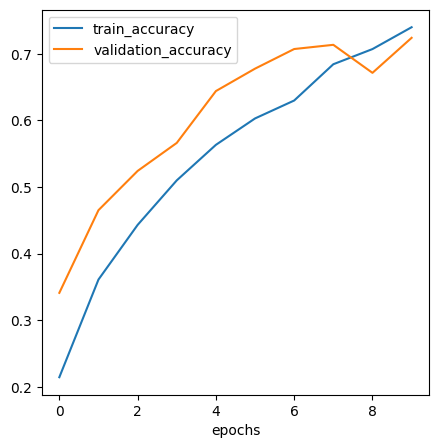

In [117]:
#performance evaluation
accuracy_plotter(seed_classifier2)

* after applying the dropout, the model did not overfit till last epoch

15/15 [==============================] - 0s 4ms/step


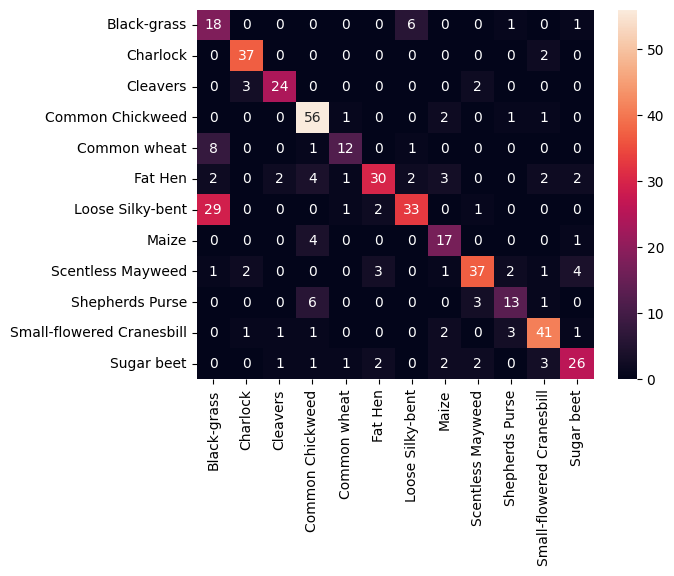

              precision    recall  f1-score   support

           0       0.31      0.69      0.43        26
           1       0.86      0.95      0.90        39
           2       0.86      0.83      0.84        29
           3       0.77      0.92      0.84        61
           4       0.75      0.55      0.63        22
           5       0.81      0.62      0.71        48
           6       0.79      0.50      0.61        66
           7       0.63      0.77      0.69        22
           8       0.82      0.73      0.77        51
           9       0.65      0.57      0.60        23
          10       0.80      0.82      0.81        50
          11       0.74      0.68      0.71        38

    accuracy                           0.72       475
   macro avg       0.73      0.72      0.71       475
weighted avg       0.76      0.72      0.73       475



In [118]:
confusion_matrix_plot(model, x_val_sc, y_val_en, y_val)

* none of the recall values were lower than 0.5 which indicates that the network was able to predict more proportions of any particular class in the dataset relative to the other model. for examples, 69% of BlackGrass in the dataset (class 0) was accurately classified relative to 23% recorded from the first network

## Model Imporovement : 2
### Data Augmentation
#### Concept:
* After combating overfiting by applying dropout(0.5), getting variants of the input images (not duplicates) will likely make the model robust to changes in test images or new images and may likely increase the accuracy
* the disadvantage however, is that more time will be used to train the network

#### Scope:
* initialize the train data generator
* clear the backend, set the seed
* train the network
* evaluate the performance

In [119]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator



In [120]:
#initialize the train data generator
train_datagen = ImageDataGenerator(zoom_range=0.3, vertical_flip=True, rescale=1.0/255) #the images were flipped vertically and zoomed in to get 
#variants of every images.


In [121]:
#clear backend, set seed and train the network
#clear backend
backend.clear_session()

#set seed
import random
random.seed(50)
tf.random.set_seed(50)
np.random.seed(50)

#initialize a sequential framework for adding layers easily
model = Sequential()

#add a conv2d layer with 32 filters and kernel size of (3,3). The strides will be at 1,1 and padding will be 'same' to avoid reduction in size of
#extracted feature map. 
model.add(Conv2D(32, (3,3), strides=(1,1), padding='same', input_shape=(64, 64, 3), activation='relu'))

#add a MaxPooling2D layer
#model.add(MaxPooling2D())



# Adding second conv layer with 32 filters and kernel size 3x3 , padding 'same'
model.add(Conv2D(64, (3,3), padding='same', activation = 'relu'))

# Adding max pooling to reduce the size of output of second conv layer
model.add(MaxPooling2D())

# Adding second conv layer with 32 filters and kernel size 3x3 , padding 'same'
model.add(Conv2D(64, (3,3), padding='same', activation = 'relu'))

# Adding max pooling to reduce the size of output of second conv layer
model.add(MaxPooling2D())


# add a flatten layer to flatten the extracted feature maps from the convolutional blocks
model.add(Flatten())

#add a dense layer with 64 neurons
model.add(Dense(124, activation='relu'))

#add a dropout layer
model.add(Dropout(0.5))

#add a dense layer with 32 neurons
model.add(Dense(32, activation='relu'))

# Adding the output layer with 12 neurons and activation functions as softmax since this is a multi-class classification problem  
model.add(Dense(units=len(np.unique(y_train)), activation = 'softmax'))


#compile the model
model.compile(metrics=['accuracy'], loss='categorical_crossentropy', optimizer='adam')

#model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 64)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 16384)             0

In [26]:
#earlystopping as callback to stop training if improvement is no longer observed
es = EarlyStopping(monitor='val_accuracy', mode='max', patience=4,verbose=2)

#model checkpoint to save best model performance at every epoch
ms = ModelCheckpoint(filepath = '/content/drive/MyDrive/datasets/project/augment_balanced_model_3.hdf5',
    monitor='val_accuracy',verbose = 0, save_best_only = True, mode='max',save_weights_only=True)

In [123]:
seed_classifier3 = model.fit(train_datagen.flow(x_train_reshaped, y_train_en, batch_size=64, seed=50),
                             epochs=10,
                            verbose=2, validation_data=(x_val_sc, y_val_en), callbacks=[es],
                             steps_per_epoch=x_train_reshaped.shape[0] // 64)

Epoch 1/10
98/98 - 11s - loss: 2.2220 - accuracy: 0.1909 - val_loss: 1.8809 - val_accuracy: 0.3305 - 11s/epoch - 111ms/step
Epoch 2/10
98/98 - 10s - loss: 1.8443 - accuracy: 0.2991 - val_loss: 1.5758 - val_accuracy: 0.4337 - 10s/epoch - 102ms/step
Epoch 3/10
98/98 - 11s - loss: 1.6395 - accuracy: 0.3706 - val_loss: 1.4081 - val_accuracy: 0.4737 - 11s/epoch - 114ms/step
Epoch 4/10
98/98 - 12s - loss: 1.4961 - accuracy: 0.4309 - val_loss: 1.3121 - val_accuracy: 0.5979 - 12s/epoch - 127ms/step
Epoch 5/10
98/98 - 12s - loss: 1.3724 - accuracy: 0.4924 - val_loss: 1.1694 - val_accuracy: 0.6716 - 12s/epoch - 120ms/step
Epoch 6/10
98/98 - 7s - loss: 1.2842 - accuracy: 0.5243 - val_loss: 1.2459 - val_accuracy: 0.5684 - 7s/epoch - 73ms/step
Epoch 7/10
98/98 - 8s - loss: 1.2149 - accuracy: 0.5623 - val_loss: 1.0600 - val_accuracy: 0.6295 - 8s/epoch - 79ms/step
Epoch 8/10
98/98 - 9s - loss: 1.1686 - accuracy: 0.5647 - val_loss: 1.0002 - val_accuracy: 0.7032 - 9s/epoch - 88ms/step
Epoch 9/10
98/98 

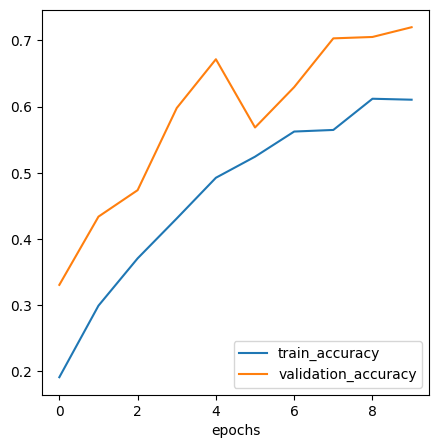

In [124]:
#performance evaluation
accuracy_plotter(seed_classifier3)

* the validation accuracy was always higher than training accuracy across all epochs

15/15 [==============================] - 0s 5ms/step


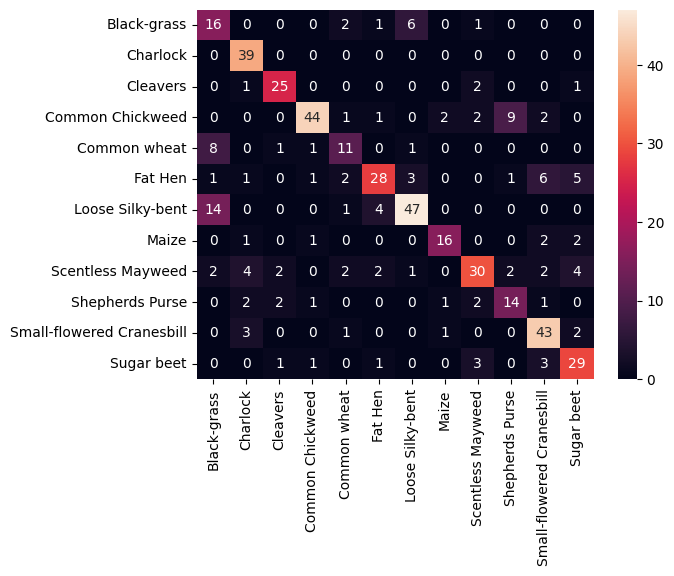

              precision    recall  f1-score   support

           0       0.39      0.62      0.48        26
           1       0.76      1.00      0.87        39
           2       0.81      0.86      0.83        29
           3       0.90      0.72      0.80        61
           4       0.55      0.50      0.52        22
           5       0.76      0.58      0.66        48
           6       0.81      0.71      0.76        66
           7       0.80      0.73      0.76        22
           8       0.75      0.59      0.66        51
           9       0.54      0.61      0.57        23
          10       0.73      0.86      0.79        50
          11       0.67      0.76      0.72        38

    accuracy                           0.72       475
   macro avg       0.71      0.71      0.70       475
weighted avg       0.74      0.72      0.72       475



In [125]:
confusion_matrix_plot(model, x_val_sc, y_val_en, y_val)

* despite data augmentation, the network seemed not overfit. An average recall of 0.71 was obtained.
* Charlock plant seedling had a recall of 1.0 which means that there was no misclassification made by the model as all the images of charlock plant was accurately classified.

## Model Improvement 3:
### Transfered Learning using VGG19 model

#### Concept:
* The pre-built architecture - VGG19 will be loaded, which was trained on the ImageNet dataset.

* For training VGG19, we will directly use the convolutional and pooling layers and freeze their weights i.e. no training will be done on them. For classification, we will replace the existing fully-connected layers with FC layers created specifically for our problem.

* The idea is that these models had already been trained on numerous images and have derived some learnings that we want to use to learn and extract the features in our own data

#### Scope:
* import the vgg19 model
* freeze the layers
* build the architecture
* train the network

In [126]:
#import VGG!9 model
from tensorflow.keras.applications.vgg19 import VGG19, preprocess_input 
#preprocess_input will be used to process our images in a similar way as the images the vgg19 network was trained on


In [127]:
#intialize the vgg19 model and exclude the dense layer
vgg19 = VGG19(weights='imagenet', input_shape=(64,64,3), include_top=False)

#freeze the Conv2D layers
for layers in vgg19.layers:
  layers.trainable = False

#view the vgg19 model
#vgg19.summary()

80134624/80134624 [==============================] - 6s 0us/step


In [128]:
#clear backend, set seed and train the network
#clear backend
backend.clear_session()

#set seed
import random
random.seed(50)
tf.random.set_seed(50)
np.random.seed(50)
#build the architecture
model = Sequential()

#add the vgg19 convolutional blocks
model.add(vgg19)

#add the dense layer for classification
# add a flatten layer to flatten the extracted feature maps from the convolutional blocks
model.add(Flatten())

#add a dense layer with 1024 neurons
model.add(Dense(1024, activation='relu'))

#add a dropout layer
model.add(Dropout(0.5))

#add a dense layer with 32 neurons
model.add(Dense(32, activation='relu'))

# Adding the output layer with 12 neurons and activation functions as softmax since this is a multi-class classification problem  
model.add(Dense(units=len(np.unique(y_train)), activation = 'softmax'))


#compile the model
model.compile(metrics=['accuracy'], loss='categorical_crossentropy', optimizer='adam')

#model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 2, 2, 512)         20024384  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 1024)              2098176   
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                                 
 dense_1 (Dense)             (None, 32)                32800     
                                                                 
 dense_2 (Dense)             (None, 12)                396       
                                                                 
Total params: 22,155,756
Trainable params: 2,131,372
Non

In [27]:
#earlystopping as callback to stop training if improvement is no longer observed
es = EarlyStopping(monitor='val_accuracy', mode='max', patience=4,verbose=2)

#model checkpoint to save best model performance at every epoch
ms = ModelCheckpoint(filepath = '/content/drive/MyDrive/datasets/project/vgg19_tf_model_4.hdf5',
    monitor='val_accuracy',verbose = 0, save_best_only = True, mode='max',save_weights_only=True)

In [130]:
seed_classifier4 = model.fit(train_datagen.flow(x_train_reshaped, y_train_en, batch_size=64, seed=50),
                             epochs=10,
                            verbose=2, validation_data=(x_val_sc, y_val_en), callbacks=[es, ms],
                             steps_per_epoch=x_train_reshaped.shape[0] // 64)

Epoch 1/10
98/98 - 12s - loss: 2.3115 - accuracy: 0.1656 - val_loss: 2.0291 - val_accuracy: 0.2758 - 12s/epoch - 124ms/step
Epoch 2/10
98/98 - 9s - loss: 1.9988 - accuracy: 0.2674 - val_loss: 1.8492 - val_accuracy: 0.3158 - 9s/epoch - 88ms/step
Epoch 3/10
98/98 - 9s - loss: 1.8487 - accuracy: 0.3266 - val_loss: 1.7360 - val_accuracy: 0.4379 - 9s/epoch - 90ms/step
Epoch 4/10
98/98 - 7s - loss: 1.7468 - accuracy: 0.3654 - val_loss: 1.6549 - val_accuracy: 0.3853 - 7s/epoch - 76ms/step
Epoch 5/10
98/98 - 9s - loss: 1.6778 - accuracy: 0.3902 - val_loss: 1.5658 - val_accuracy: 0.4737 - 9s/epoch - 90ms/step
Epoch 6/10
98/98 - 7s - loss: 1.6255 - accuracy: 0.4118 - val_loss: 1.5095 - val_accuracy: 0.4863 - 7s/epoch - 76ms/step
Epoch 7/10
98/98 - 7s - loss: 1.5386 - accuracy: 0.4404 - val_loss: 1.5269 - val_accuracy: 0.4484 - 7s/epoch - 76ms/step
Epoch 8/10
98/98 - 9s - loss: 1.5342 - accuracy: 0.4504 - val_loss: 1.3840 - val_accuracy: 0.5242 - 9s/epoch - 88ms/step
Epoch 9/10
98/98 - 8s - loss:

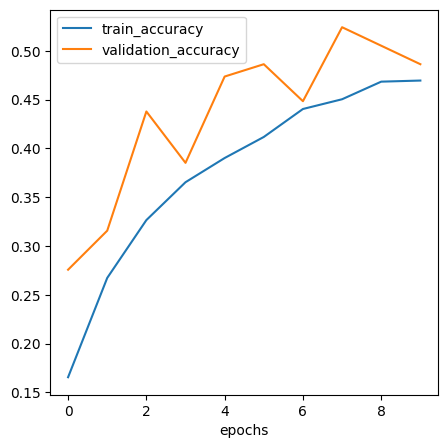

In [131]:
#performance evaluation
accuracy_plotter(seed_classifier4)

* despite model complexity as a result of number of parameters, the network seem not to overfit on the augmented data. However, the accuracy was the lowest so far

15/15 [==============================] - 0s 21ms/step


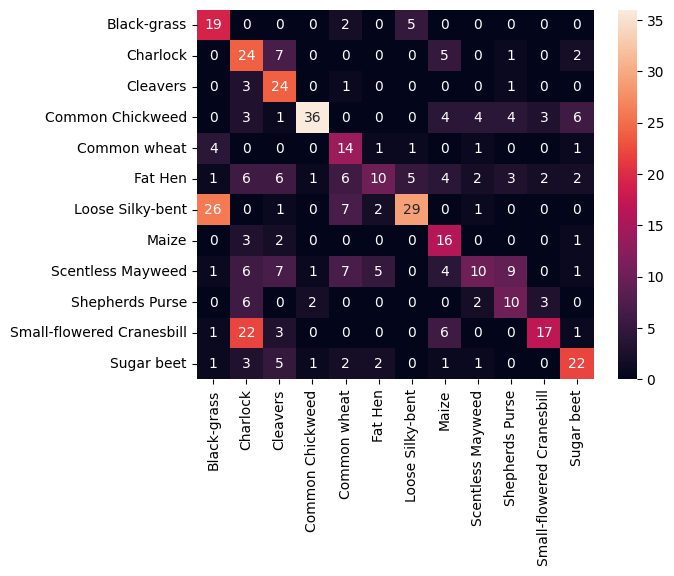

              precision    recall  f1-score   support

           0       0.36      0.73      0.48        26
           1       0.32      0.62      0.42        39
           2       0.43      0.83      0.56        29
           3       0.88      0.59      0.71        61
           4       0.36      0.64      0.46        22
           5       0.50      0.21      0.29        48
           6       0.72      0.44      0.55        66
           7       0.40      0.73      0.52        22
           8       0.48      0.20      0.28        51
           9       0.36      0.43      0.39        23
          10       0.68      0.34      0.45        50
          11       0.61      0.58      0.59        38

    accuracy                           0.49       475
   macro avg       0.51      0.53      0.48       475
weighted avg       0.56      0.49      0.48       475



In [132]:
confusion_matrix_plot(model, x_val_sc, y_val_en, y_val)

* the VGG19 transfered learning model did not overfit on the validation set, however lower accuracy, precision and recall was recorded

## Model Improvement Strategy 4:
### Fine-Tuning Transfered Learning
#### Concept:
* oftentimes, lower convolutional blocks learn general features while the higher convolutional blocks learn specialized features.
* Instead of freezing the entire blocks, allowing some of the top conv2d layers to be trainable could be beneficial in helping the model learn more task-specific features from the data.

#### Scope:
* Find the length of VGG19 convolutional layers
* Freeze some lower portions of the layers
* Train the network
* Evaluate the accuracy

 

In [133]:
print(f"There are {len(vgg19.layers)} layers in VGG19's convolutional layer")

There are 22 layers in VGG19's convolutional layer


In [134]:
#Freeze some portion of lower layers and train the top ones
for layer in model.layers[0].layers[15:]: #this returns the top layers (15 and above) of the vgg19 model since it is the first model
  layer.trainable=True #set those layers to be trainable

In [135]:
#model summary
model.summary()
#compile the model
model.compile(metrics=['accuracy'], loss='categorical_crossentropy', optimizer='adam')


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 2, 2, 512)         20024384  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 1024)              2098176   
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                                 
 dense_1 (Dense)             (None, 32)                32800     
                                                                 
 dense_2 (Dense)             (None, 12)                396       
                                                                 
Total params: 22,155,756
Trainable params: 13,930,412
No

In [136]:
#train the network
seed_classifier5 = model.fit(x_train_bal_sc, y_train_en,
                             epochs=10,
                            verbose=2, validation_data=(x_val_sc, y_val_en), callbacks=[es, ms])

Epoch 1/10
197/197 - 11s - loss: 3.6847 - accuracy: 0.1305 - val_loss: 1.9621 - val_accuracy: 0.2484 - 11s/epoch - 54ms/step
Epoch 2/10
197/197 - 7s - loss: 1.8839 - accuracy: 0.2449 - val_loss: 1.7208 - val_accuracy: 0.3789 - 7s/epoch - 35ms/step
Epoch 3/10
197/197 - 6s - loss: 1.7770 - accuracy: 0.2878 - val_loss: 1.8556 - val_accuracy: 0.2758 - 6s/epoch - 33ms/step
Epoch 4/10
197/197 - 7s - loss: 1.5882 - accuracy: 0.3634 - val_loss: 1.5887 - val_accuracy: 0.3495 - 7s/epoch - 33ms/step
Epoch 5/10
197/197 - 6s - loss: 1.3365 - accuracy: 0.4876 - val_loss: 1.5873 - val_accuracy: 0.4000 - 6s/epoch - 32ms/step
Epoch 6/10
197/197 - 6s - loss: 1.1397 - accuracy: 0.5628 - val_loss: 1.3416 - val_accuracy: 0.5074 - 6s/epoch - 31ms/step
Epoch 7/10
197/197 - 6s - loss: 0.9676 - accuracy: 0.6308 - val_loss: 1.4633 - val_accuracy: 0.4442 - 6s/epoch - 31ms/step
Epoch 8/10
197/197 - 6s - loss: 0.8910 - accuracy: 0.6581 - val_loss: 1.4079 - val_accuracy: 0.5242 - 6s/epoch - 31ms/step
Epoch 9/10
197

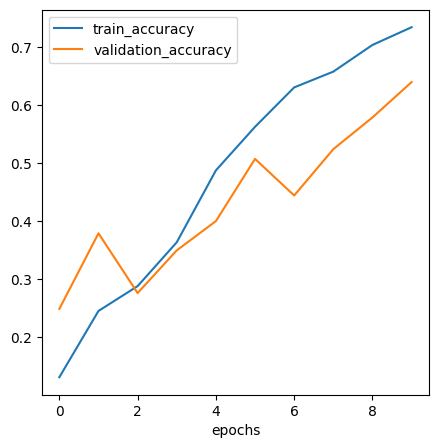

In [137]:
#performance evaluation
accuracy_plotter(seed_classifier5)

15/15 [==============================] - 0s 22ms/step


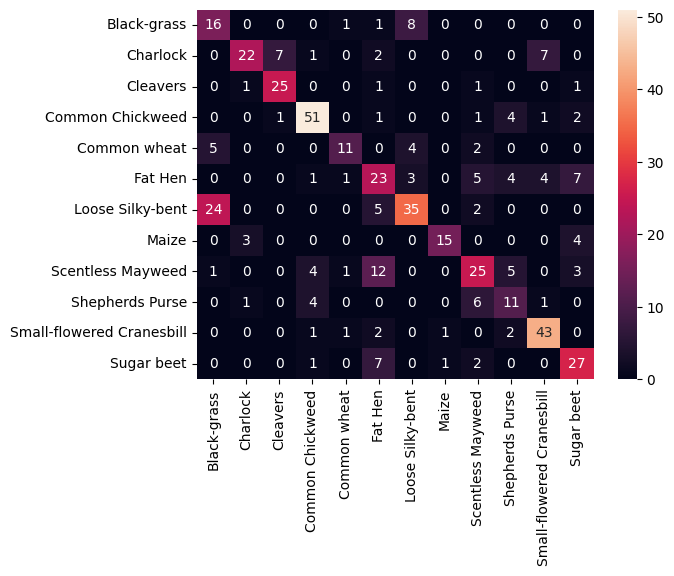

              precision    recall  f1-score   support

           0       0.35      0.62      0.44        26
           1       0.81      0.56      0.67        39
           2       0.76      0.86      0.81        29
           3       0.81      0.84      0.82        61
           4       0.73      0.50      0.59        22
           5       0.43      0.48      0.45        48
           6       0.70      0.53      0.60        66
           7       0.88      0.68      0.77        22
           8       0.57      0.49      0.53        51
           9       0.42      0.48      0.45        23
          10       0.77      0.86      0.81        50
          11       0.61      0.71      0.66        38

    accuracy                           0.64       475
   macro avg       0.65      0.63      0.63       475
weighted avg       0.66      0.64      0.64       475



In [138]:
confusion_matrix_plot(model, x_val_sc, y_val_en, y_val)

* the fine-tuned transfer learning model did performed better than the standard VGG19 model. However it tended to overfit

## Hyper-Paramter Tuning
#### Concept:
* From  the techniques employed in this project, the network perfromed best when the balanced data was augmented because:
  * 1. overfiting did not occur at all
  * 2. it had the high val_accuracy
  * 3. it had more data and the model would be more robust to some changes in new data

* Hyper_parameter tuning will be done using Hyperband on this particluar network only.

#### Scope:
* Build a pipeline that describes Network Architecture
* Initialize Hyperband
* Search for parameters
* get best parameters
* train hypermodel using hyper parameters

In [139]:
pip install keras-tuner

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.1/176.1 kB 6.5 MB/s eta 0:00:00


In [140]:
from keras_tuner.tuners import Hyperband

In [141]:
def build_mod(hp):
  """
  hp:hyperparameter
  """
  model = Sequential()
  #add your cnn blocks
  filters = hp.Int('filters', min_value=32, max_value=200, step = 32)
  model.add(Conv2D(filters=filters, kernel_size=(3,3), strides=(1,1), padding='same', input_shape=(64, 64, 3), activation='relu'))


# Adding second conv layer with 32 filters and kernel size 3x3 , padding 'same'
  model.add(Conv2D(filters=filters, kernel_size=(3,3), padding='same', activation = 'relu')) 

# Adding max pooling to reduce the size of output of second conv layer
  model.add(MaxPooling2D())

# Adding second conv layer with 32 filters and kernel size 3x3 , padding 'same'
  model.add(Conv2D(filters=filters, kernel_size=(3,3), padding='same', activation = 'relu'))

# Adding max pooling to reduce the size of output of second conv layer
  model.add(MaxPooling2D())


  #flatten the output of the cnn blocks
  model.add(Flatten())

  neurons = hp.Int('hidden_units', min_value=32, max_value=200, step = 32)
  #add a dense layer for classificiation
  model.add(Dense(units=neurons, activation='relu'))

  #add  a dropout layer
  drop_out = hp.Choice('rate', values=[0.2, 0.3, 0.4, 0.5])
  model.add(Dropout(rate=drop_out))

  #add a dense layer with 32 neurons
  model.add(Dense(units=neurons, activation='relu'))

  # Adding the output layer with 12 neurons and activation functions as softmax since this is a multi-class classification problem  
  model.add(Dense(units=len(np.unique(y_train)), activation = 'softmax'))



  from tensorflow.keras.optimizers import Adam, Adamax, SGD
  adam=Adam()
  adamax= Adamax()
  sgd=SGD()

  hp_lr= hp.Choice('learning_rate', values=[1e-2, 1e-3,1e-4])
  #opt= hp.Choice('optimizer', values=[adam])
  model.compile(optimizer=Adam(learning_rate=hp_lr), loss='categorical_crossentropy', metrics=['accuracy'])

  return model

In [142]:
hyp = Hyperband(build_mod, objective='val_accuracy',
                max_epochs=10, seed=50,)
                #directory = '/content/drive/MyDrive/datasets',
                #project_name='plant_seedling-tuner-hpb')

In [143]:
#search for best hyper parameters using the augmented balanced data
hyp.search(train_datagen.flow(x_train_reshaped, y_train_en, batch_size=64, seed=50),
           epochs=10,
           validation_data=(x_val_sc, y_val_en),
           callbacks=[es],)


Trial 30 Complete [00h 01m 03s]
val_accuracy: 0.38947367668151855

Best val_accuracy So Far: 0.7389473915100098
Total elapsed time: 00h 26m 09s


In [144]:
backend.clear_session()

In [145]:
#define best set of hyper parameters
best_hp = hyp.get_best_hyperparameters()[0]

### build a model using derived best hyperparams
h_model = hyp.hypermodel.build(best_hp)

#summary view of hyper model
h_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 96)        2688      
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 96)        83040     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 96)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 96)        83040     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 96)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 24576)             0

In [ ]:
#earlystopping as callback to stop training if improvement is no longer observed
es = EarlyStopping(monitor='val_accuracy', mode='max', patience=4,verbose=2)

#model checkpoint to save best model performance at every epoch
ms = ModelCheckpoint(filepath = '/content/drive/MyDrive/datasets/project/hyper_model.hdf5',
    monitor='val_accuracy',verbose = 0, save_best_only = True, mode='max',save_weights_only=True)

In [146]:
h_model.compile(optimizer='adam', loss='categorical_crossentropy',
                metrics=['accuracy'])

history_tuning = h_model.fit(train_datagen.flow(x_train_reshaped, y_train_en, batch_size=64, seed=50),
                             epochs=10,
                             batch_size=32,
                             validation_data=(x_val_sc, y_val_en),
                             callbacks=[es, ms])

Epoch 1/10
99/99 [==============================] - 14s 113ms/step - loss: 2.2066 - accuracy: 0.1831 - val_loss: 1.7166 - val_accuracy: 0.3789
Epoch 2/10
99/99 [==============================] - 8s 81ms/step - loss: 1.7356 - accuracy: 0.3306 - val_loss: 1.8282 - val_accuracy: 0.3137
Epoch 3/10
99/99 [==============================] - 10s 96ms/step - loss: 1.5073 - accuracy: 0.4222 - val_loss: 1.2029 - val_accuracy: 0.5200
Epoch 4/10
99/99 [==============================] - 9s 94ms/step - loss: 1.2423 - accuracy: 0.5202 - val_loss: 1.0499 - val_accuracy: 0.6442
Epoch 5/10
99/99 [==============================] - 8s 81ms/step - loss: 1.0849 - accuracy: 0.6004 - val_loss: 0.9686 - val_accuracy: 0.6316
Epoch 6/10
99/99 [==============================] - 9s 95ms/step - loss: 0.9930 - accuracy: 0.6358 - val_loss: 0.8061 - val_accuracy: 0.7495
Epoch 7/10
99/99 [==============================] - 9s 93ms/step - loss: 0.9212 - accuracy: 0.6619 - val_loss: 0.8244 - val_accuracy: 0.7368
Epoch 8/10

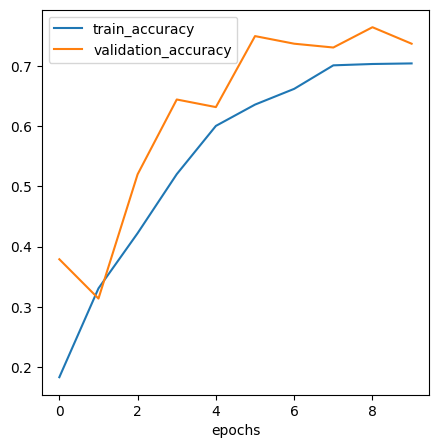

In [147]:
#Evaluate the performance
accuracy_plotter(history_tuning)

* the network did not overfir during validation.


15/15 [==============================] - 0s 9ms/step


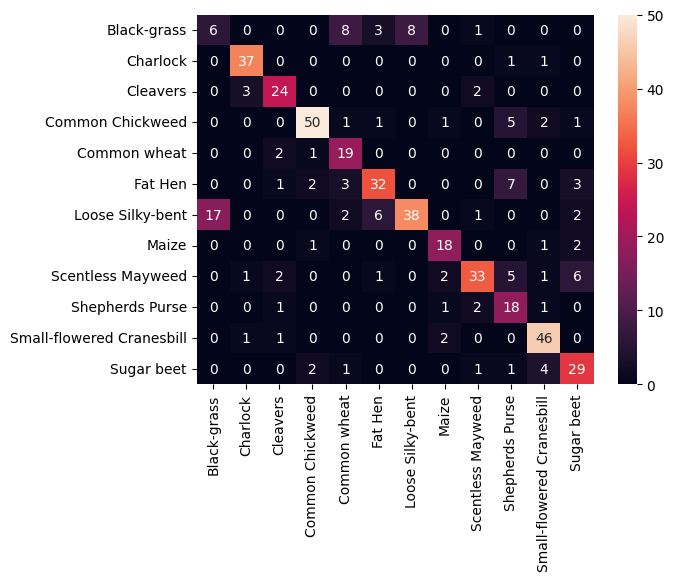

              precision    recall  f1-score   support

           0       0.26      0.23      0.24        26
           1       0.88      0.95      0.91        39
           2       0.77      0.83      0.80        29
           3       0.89      0.82      0.85        61
           4       0.56      0.86      0.68        22
           5       0.74      0.67      0.70        48
           6       0.83      0.58      0.68        66
           7       0.75      0.82      0.78        22
           8       0.82      0.65      0.73        51
           9       0.49      0.78      0.60        23
          10       0.82      0.92      0.87        50
          11       0.67      0.76      0.72        38

    accuracy                           0.74       475
   macro avg       0.71      0.74      0.71       475
weighted avg       0.75      0.74      0.74       475



In [148]:
confusion_matrix_plot(h_model, x_val_sc, y_val_en, y_val)

* the network recorded an avg recall_score of 0.74 and precision score pf 0.71

## Visualizing the predicitons Using HyperModel

In [149]:

pred_class = np.argmax(h_model.predict(x_test_sc),1) #returns an array of predicted class (index) for each image in x_test

pred_prob = np.max(h_model.predict(x_test_sc), 1) #returns an array of max probability for each image in x_test
len(pred_prob) == len(pred_class) #to confirm if they are of equal length

15/15 [==============================] - 0s 7ms/step


True

1/1 [==============================] - 0s 28ms/step


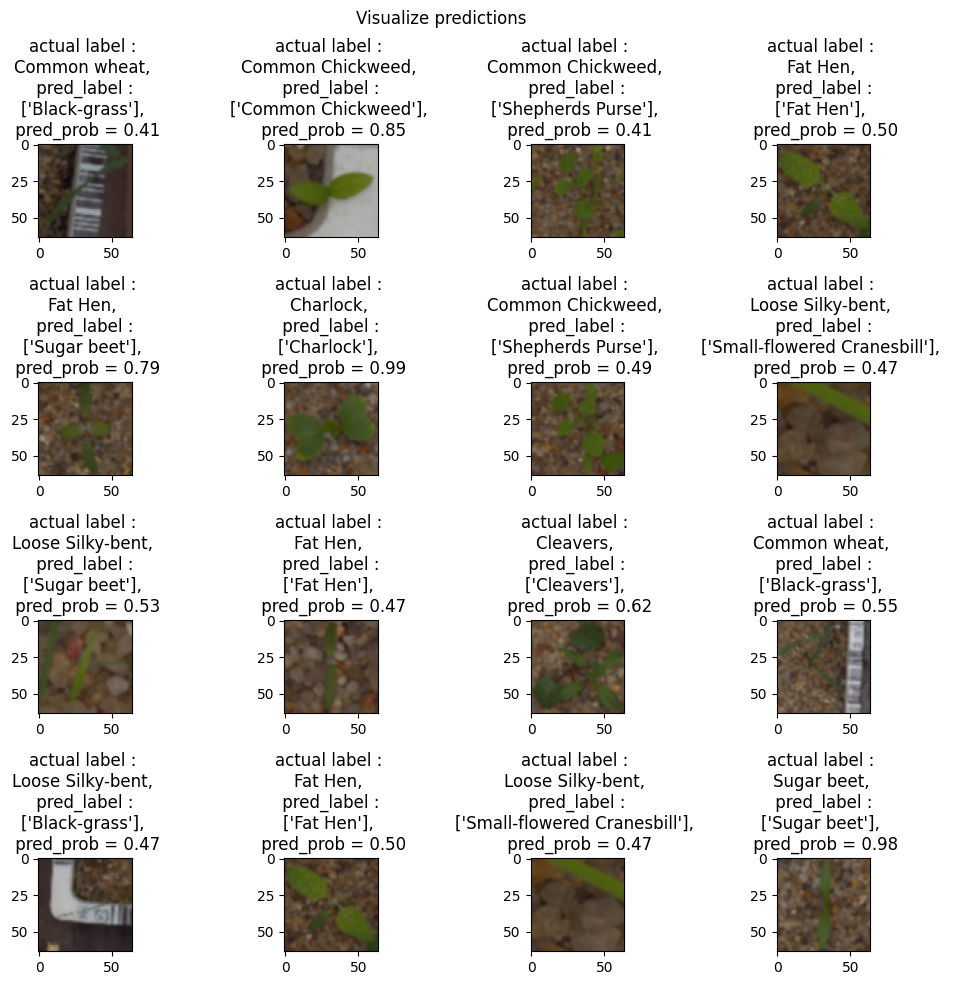

In [73]:
#make a figure of size 10,10
fig = plt.figure(figsize=(10,10))
nrows = 4 #number of rows
ncols = 4 #number of cols
for i in range(nrows): #for each row
  for j in range(ncols): #for each column
    random_num = np.random.randint(0, len(y_test_en)) #generate a random integer ranging from 0 to max length of y_test labels
    ax = plt.subplot(nrows, ncols, i * ncols + j + 1) #create a subplot at different index for each iteration
    ax.imshow(x_test[random_num])  #display the image at that subplot generated above
    pred_label = enc.inverse_transform(h_model.predict((x_test_sc[random_num]).reshape(1,64,64,3)))  #make prediction for y and inv_transform it to get pred_class
    actual_label = np.array(y_test['Label'])[random_num] #from the original data obtain the actual label
    pred_probability = pred_prob[random_num] #obtain the max_probability for that prediction
    plt.suptitle("Visualize predictions")  #display super title
    ax.set_title(f"actual label : \n{actual_label}, \n pred_label : \n{pred_label}, \n pred_prob = {pred_probability :.2f}") #display subtitles
plt.tight_layout() #allow padding
plt.show()#show plot

## Conclusion
* Data Augmentation proved to help the model imporve the recall score
* Transfered Learning using VGG19 Model was not as effective as desired,
* The Hyper model had higher recall score of 0.73 and did not overfit

## Scope for Improvement

* These models can be further improved by training with different filter sizes and different number of filters.
* Increasing the size of the image may improve the model performance
* More Data Augmentation techniques can be performed and dropout_rate can be changed to improve the model performance.
* Other Transfer Learning architectures can also be used to train the CNN model and these models can be used for classification.
